In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples= n_pts, random_state= 123, centers= centers, cluster_std= 0.4)

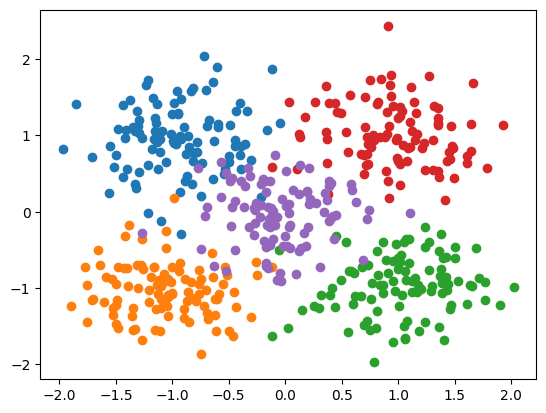

In [ ]:
plt.scatter(X[y== 0, 0], X[y== 0, 1])
plt.scatter(X[y== 1, 0], X[y== 1, 1])
plt.scatter(X[y== 2, 0], X[y== 2, 1])
plt.scatter(X[y== 3, 0], X[y== 3, 1])
plt.scatter(X[y== 4, 0], X[y== 4, 1])

In [ ]:
print(y)
y_cat = to_categorical(y, 5) #One hot encoding
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [ ]:
model = Sequential()
model.add(Dense(units= 5, input_shape= (2,), activation= 'softmax'))
model.compile(Adam(0.1), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
h = model.fit(x= X, y= y_cat, verbose= 1, batch_size= 50, epochs= 100)

Epoch 1/100
10/10 [==============================] - 1s 12ms/step - loss: 1.4816 - accuracy: 0.3040
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.8080
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.9080
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3599 - accuracy: 0.9340
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3091 - accuracy: 0.9320
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.9380
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.9440
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.9540
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9500
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9440
Epoch 11

In [ ]:
def plot_decision_boundry(X, y_cat, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  #pred_func = model.predict_classes(grid)
  pred_func = np.argmax(model.predict(grid),axis=1)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 4ms/step


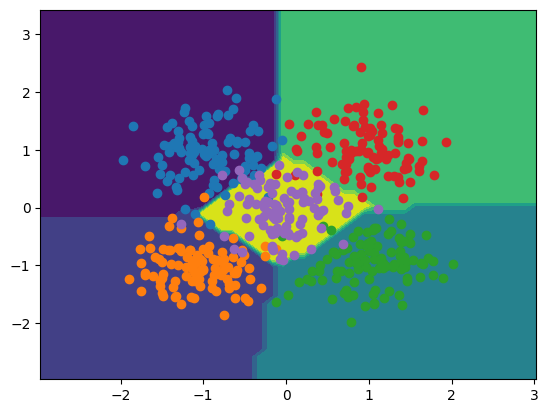

In [ ]:
plot_decision_boundry(X, y_cat, model)

plt.scatter(X[y== 0, 0], X[y== 0, 1])
plt.scatter(X[y== 1, 0], X[y== 1, 1])
plt.scatter(X[y== 2, 0], X[y== 2, 1])
plt.scatter(X[y== 3, 0], X[y== 3, 1])
plt.scatter(X[y== 4, 0], X[y== 4, 1])

1/1 [==============================] - 0s 41ms/step
Prediction is  [2]


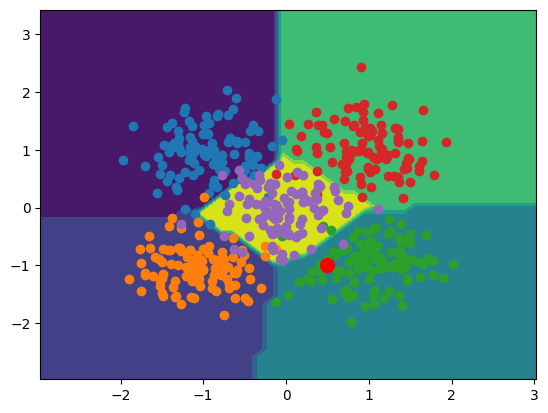

In [ ]:
plot_decision_boundry(X, y_cat, model)

plt.scatter(X[y== 0, 0], X[y== 0, 1])
plt.scatter(X[y== 1, 0], X[y== 1, 1])
plt.scatter(X[y== 2, 0], X[y== 2, 1])
plt.scatter(X[y== 3, 0], X[y== 3, 1])
plt.scatter(X[y== 4, 0], X[y== 4, 1])

x = 0.5
y = -1

point = np.array([[x, y]])
prediction = np.argmax(model.predict(point),axis=1)
plt.plot([x], [y], marker= 'o', markersize= 10, color= "r")
print("Prediction is ", prediction)